Inhoud:
- 1. Import Library
- 2. Create path
- 3. Split images
- 4. Generate dataset
- 5. Preprosessing
- 6. Split dataset (Train, Test and Val)
- 7. Train models
- 8. Check/Evaluation

## 1. Import Library

In [141]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from matplotlib.image import imread

import cv2
import os
import shutil

from keras.applications import VGG19
from keras.applications import ResNet50

from datetime import datetime
from tensorflow.keras.models import load_model

In [142]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## 2. Create path

In [143]:
# Initialize path

# Load csv
dt = pd.read_csv('P2_Fabric_data_csv.csv', encoding = 'ISO-8859-1', skipinitialspace = True)

#step 1: crate path for original data
data = r'C:\Users\agusb\Desktop\22V_5XP10_T15_filtered'
#step 2: create path for splitted images
data_temp = r'C:\Users\agusb\Desktop\splitted'
#step 3: create path for collecting images
data_processed = r'C:\Users\agusb\Desktop\collect'

#input shape
input_shape = 256

## 3. Split images

In [144]:
#Create folder
def make_file(file):
    try:
        os.mkdir(file)
    except OSError as error:
        print(error)
        
#Read folder
def read_file(file):
    try:
        return os.listdir(file)
    except OSError as error:
        print(error) 
        
#Delete file
def delete_file(file):
    if os.path.exists(file):
        os.remove(file)
        print(file + ' deleted')
    else:
        print('the file doesn''\'t exist!')
        
#Delete folder
def delete_folder(folder):
    if os.path.exists(folder):
        os.rmdir(folder)
        print(folder + ' deleted')
    else:
        print('the folder doesn''\'t exist!')

In [130]:
make_file(data_temp)

In [131]:
image_data = read_file(data)

In [132]:
tot_start_time = datetime.now()

for beeld in image_data:
    
    start_time = datetime.now() #timer start
    
    img_path = os.path.join(os.path.join(data), beeld) # create a path to the image
    
    #skip corrupted images
    try:
        img = cv2.imread(img_path) # load the image
    
        img = cv2.resize(img, dsize=(5000,5000), interpolation=cv2.INTER_CUBIC) # resize image to dimensions of 5000*5000
    
        full_path = os.path.join(data_temp, beeld[:-4]) # create a path to save the splitted image
    
        make_file(full_path) # create a folder 
    
        hoogte = img.shape[0] # initialize variable for the first dimension
        breedte = img.shape[1] # initialize variable for the second dimension
    
        hoog = hoogte // 25 # divide height by 25
        breed = breedte // 25 # divide weight by 25
    
        for x in range(0,hoogte, hoog): # iterate using range function and skip every "hoog" value
            for y in range(0,breedte, breed): # iterate using range function and skip every "breed" value
        
                beeld_gesplitst = img[x:x+hoog, y:y+breed] # create an image based on the iteration
        
                cv2.imwrite(full_path + '/' + beeld[:13] + '_' + str(y) + '_' + str(x) + '.png',beeld_gesplitst) # save the image
            
        
        end_time = datetime.now() #timer stop
        print(full_path + ' is created ' + str(end_time - start_time) + ' seconden')
    
        delete_file(img_path) # delete the original image
        
    except:
        print('Corrupted image: ', img_path)
        #skip iteration when the image is corrupted or not in image format
        pass 
        
tot_end_time = datetime.now() # Total timer
print( 'Totaal in ' + str(tot_end_time - tot_start_time) + ' seconden')

C:\Users\agusb\Desktop\New folder (2)\split\21F00012_0000_NRM is created 0:00:02.344243 seconden
C:\Users\agusb\Desktop\New folder (2)\split\21F00012_0000_ROUGH is created 0:00:01.679006 seconden
Totaal in 0:00:04.024242 seconden


### Separate Woven and Knit

In [133]:
dt.columns = [c.replace(' ', '_') for c in dt.columns] # replace space in column name with "_"

In [134]:
dt

,General_Identifier,Category_Code,Category_Description,Textile_Description,Structure_and_Construction,Composition,Mass/Weight_in_g/m2,Thickness,Clo_Bending_WEFT_Contact_Distance_mm_,Clo_Bending_WEFT_Contact_Length_mm_,...,Clo_Shear_BIAS_1__Length_in_mm,Clo_Shear_BIAS_1__Force,Clo_Shear_BIAS_2_Length_mm,Clo__Shear_BIAS_2__Force,Clo__Shear_BIAS_3_Length_mm,Clo__Shear_BIAS_3_Force,Clo__Shear_BIAS_4_Length_mm,Clo__Shear_BIAS_4_Force,Clo__Shear_BIAS_5_Length_mm,Clo__Shear_BIAS_5_Force
0,21F00013,A1,Sheer - Fragile,Silk Organza,Woven,100% SE,21 g/m2,0.110,40.666667,47.916667,...,20.0,0.010000,30.0,0.029667,40.0,0.084333,50.0,0.232000,60.0,0.881333
1,21F00015,A2,Sheer - Fragile,Silk Pong,Woven,100% SE,36 g/m2,0.080,31.000000,38.666667,...,17.0,0.010000,27.0,0.037667,37.0,0.103333,47.0,0.265000,57.0,0.816000
2,21F00012,B1,Ladies blouses,Cotton Satin-unbleached,Woven,100% CO,112 g/m2,0.220,25.750000,36.416667,...,5.5,0.010000,15.5,0.048333,25.5,0.121000,35.5,0.264000,45.5,0.644333
3,21F00018,B2,Ladies blouses,Poplin / Organic,Woven,100% CO,120 g/m2,0.009,18.250000,31.083333,...,1.0,0.010000,2.0,0.014333,3.0,0.020333,4.0,0.025333,5.0,0.032667
4,21F00035,C1,Sweaters,Winter sweat,Knit,"70% CO, 30% PES",295 g/m2,1.250,33.333333,42.833333,...,5.0,0.010000,6.0,0.013667,7.0,0.017333,8.0,0.021667,9.0,0.026333
5,21F00036,C2,Sweaters,French Terry,Knit,"95% CO, 5% EA",280 g/m2,0.810,28.333333,37.333333,...,1.0,0.010667,11.0,0.027667,21.0,0.051667,31.0,0.085667,41.0,0.118000
6,22F00001,D1,Suiting,Slightly felted wool,Woven,100% WO,279 g/m2,0.780,25.000000,35.333333,...,2.0,0.011667,12.0,0.121333,22.0,0.270000,32.0,0.491333,42.0,0.767000
7,22F00002,D2,Suiting,Wool (CK),Woven,"Wo (warp), PES, CV, EL (Weft)",198 g/m2,0.420,15.333333,29.000000,...,5.0,0.010000,15.0,0.035000,25.0,0.088333,35.0,0.150333,45.0,0.266333
8,21F00020,E1,Jeans / sportive,Heavy Twill/White denim,Woven,100% CO,381 g/m2,0.610,43.916667,50.750000,...,1.0,0.072667,2.0,0.107000,3.0,0.150333,4.0,0.190333,5.0,0.233000
9,22F00000,E2,Jeans / sportive,Raw Denim,Woven,100% CO,470 g/m2,0.930,33.333333,41.750000,...,1.0,0.012000,11.0,0.153333,21.0,0.388667,31.0,0.800333,41.0,1.303333


In [135]:
dt2 = dt[dt['Structure_and_Construction'] != 'Knit'] # get woven

In [136]:
# dt2 = dt[dt['Structure_and_Construction'] != 'Woven'] # get knit

In [137]:
dt2

,General_Identifier,Category_Code,Category_Description,Textile_Description,Structure_and_Construction,Composition,Mass/Weight_in_g/m2,Thickness,Clo_Bending_WEFT_Contact_Distance_mm_,Clo_Bending_WEFT_Contact_Length_mm_,...,Clo_Shear_BIAS_1__Length_in_mm,Clo_Shear_BIAS_1__Force,Clo_Shear_BIAS_2_Length_mm,Clo__Shear_BIAS_2__Force,Clo__Shear_BIAS_3_Length_mm,Clo__Shear_BIAS_3_Force,Clo__Shear_BIAS_4_Length_mm,Clo__Shear_BIAS_4_Force,Clo__Shear_BIAS_5_Length_mm,Clo__Shear_BIAS_5_Force
0,21F00013,A1,Sheer - Fragile,Silk Organza,Woven,100% SE,21 g/m2,0.110,40.666667,47.916667,...,20.0,0.010000,30.0,0.029667,40.0,0.084333,50.0,0.232000,60.0,0.881333
1,21F00015,A2,Sheer - Fragile,Silk Pong,Woven,100% SE,36 g/m2,0.080,31.000000,38.666667,...,17.0,0.010000,27.0,0.037667,37.0,0.103333,47.0,0.265000,57.0,0.816000
2,21F00012,B1,Ladies blouses,Cotton Satin-unbleached,Woven,100% CO,112 g/m2,0.220,25.750000,36.416667,...,5.5,0.010000,15.5,0.048333,25.5,0.121000,35.5,0.264000,45.5,0.644333
3,21F00018,B2,Ladies blouses,Poplin / Organic,Woven,100% CO,120 g/m2,0.009,18.250000,31.083333,...,1.0,0.010000,2.0,0.014333,3.0,0.020333,4.0,0.025333,5.0,0.032667
6,22F00001,D1,Suiting,Slightly felted wool,Woven,100% WO,279 g/m2,0.780,25.000000,35.333333,...,2.0,0.011667,12.0,0.121333,22.0,0.270000,32.0,0.491333,42.0,0.767000
7,22F00002,D2,Suiting,Wool (CK),Woven,"Wo (warp), PES, CV, EL (Weft)",198 g/m2,0.420,15.333333,29.000000,...,5.0,0.010000,15.0,0.035000,25.0,0.088333,35.0,0.150333,45.0,0.266333
8,21F00020,E1,Jeans / sportive,Heavy Twill/White denim,Woven,100% CO,381 g/m2,0.610,43.916667,50.750000,...,1.0,0.072667,2.0,0.107000,3.0,0.150333,4.0,0.190333,5.0,0.233000
9,22F00000,E2,Jeans / sportive,Raw Denim,Woven,100% CO,470 g/m2,0.930,33.333333,41.750000,...,1.0,0.012000,11.0,0.153333,21.0,0.388667,31.0,0.800333,41.0,1.303333


### Collect images based on id

#### Create submap

In [138]:
make_file(data_processed) # create folder

dt_ids = dt2['General_Identifier'] # get ids

for idx in dt_ids: # loop ids
    sub_data = os.path.join(data_processed, idx) # initialize subfolder path with id as folder name 
    try:
        os.mkdir(sub_data) # create subfolder
    except OSError as error:
        print(error) # error

#### Move images

In [139]:
for dt_map in os.listdir(data_temp):
    
    submap_path = os.path.join(data_temp, dt_map) # create submap path
    dt_submap = os.listdir(submap_path) # create submap
    
    for idex in dt_ids: #loop ids
        images = [f for f in dt_submap if idex in f] # iterate and collect all images based on the id

        for image in images: # move image to the new folder
            old_path = os.path.join(data_temp, dt_map,image)
            new_path = os.path.join(data_processed, idex,image)
            shutil.move(old_path, new_path) #move the image 
      
    try:
        delete_folder(submap_path) # delete folder
    except:
        pass

## 4. Load dataset

In [6]:
# tf.keras.utils.image_dataset_from_directory??

In [140]:
data = tf.keras.utils.image_dataset_from_directory(data_processed) # load data

Found 625 files belonging to 8 classes.


In [56]:
class_names = data.class_names
print(class_names)

['21F00012', '21F00013', '21F00015', '21F00018', '21F00020', '22F00000', '22F00001', '22F00002']


## 5. Preprosessing

### Scale data

In [57]:
data = data.map(lambda x, y: (x/255, y)) # scale the image value between 0 and 1

### Plot

In [58]:
# get batch to be plotted
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

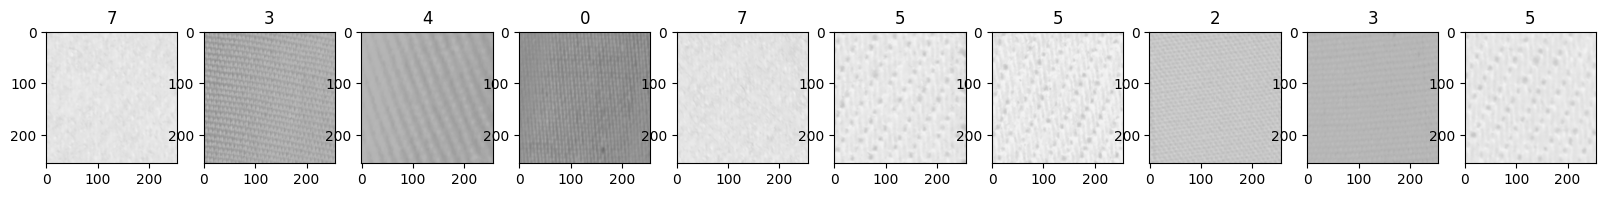

In [59]:
# plot data with labels
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 6. Split data

In [60]:
len(data) # length of the batch

3907

In [61]:
# split 70%, 20% and 10%
train_size = int(len(data)*.7) # 70%
val_size = int(len(data)*.2) # 20%
test_size = int(len(data)*.1)+1 # 10%

In [62]:
train = data.take(train_size) # take 70% of the data for train set

In [63]:
val = data.skip(train_size).take(val_size) # take 20 % of the data for validation set

In [64]:
test = data.skip(train_size+val_size).take(test_size) # take 10 % of the data for test set

## 7. Train model

In [65]:
import keras
from keras.models import Model
from keras import models, layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

# CNN

In [29]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(input_shape, input_shape, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())

model1.add(layers.Dense(128, activation='relu'))

model1.add(Dropout(0.5))

model1.add(layers.Dense(8, activation='softmax'))

model1.compile(optimizer='adam',metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)      

# LENET

In [66]:
m = keras.models.Sequential([
        keras.layers.Conv2D(32, kernel_size=5, strides=1,
                            activation='tanh', input_shape=(input_shape, input_shape, 3), padding='same'),  # C1
        keras.layers.AveragePooling2D(),  # S2
        keras.layers.Conv2D(16, kernel_size=5, strides=1,
                            activation='tanh', padding='valid'),  # C3
        keras.layers.AveragePooling2D(),  # S4
        keras.layers.Conv2D(128, kernel_size=5, strides=1,
                            activation='tanh', padding='valid'),  # C5
        keras.layers.Flatten(),
        keras.layers.Dense(84, activation='tanh'),  # F6
        keras.layers.Dense(8, activation='softmax')  # Output layer

    ])
model2 = m

model2.compile(optimizer='adam',metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 average_pooling2d (AverageP  (None, 128, 128, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      12816     
                                                                 
 average_pooling2d_1 (Averag  (None, 62, 62, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 128)       51328     
                                                                 
 flatten (Flatten)           (None, 430592)            0

In [67]:
history2 = model2.fit(train, epochs = 10, validation_data = val)

Epoch 1/10
2734/2734 [==============================] - 282s 102ms/step - loss: 2.1312 - accuracy: 0.1253 - val_loss: 2.0882 - val_accuracy: 0.1303
Epoch 2/10
2734/2734 [==============================] - 297s 108ms/step - loss: 2.0894 - accuracy: 0.1253 - val_loss: 2.0869 - val_accuracy: 0.1302
Epoch 3/10
2734/2734 [==============================] - 309s 113ms/step - loss: 2.0888 - accuracy: 0.1250 - val_loss: 2.0862 - val_accuracy: 0.1302
Epoch 4/10
 729/2734 [======>.......................] - ETA: 2:47 - loss: 2.0895 - accuracy: 0.1224

KeyboardInterrupt: 

# VGG19

In [45]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(input_shape, input_shape, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Create the new model on top
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)
model3 = Model(inputs=base_model.input, outputs=predictions)

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [46]:
model3.compile(optimizer='adam',metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [47]:
history = model3.fit(train, epochs = 5, validation_data = val)

Epoch 1/5
2734/2734 [==============================] - 887s 324ms/step - loss: 0.2860 - accuracy: 0.9183 - val_loss: 0.2009 - val_accuracy: 0.9181
Epoch 2/5
2734/2734 [==============================] - 972s 355ms/step - loss: 0.1231 - accuracy: 0.9592 - val_loss: 0.0746 - val_accuracy: 0.9755
Epoch 3/5
2734/2734 [==============================] - 1002s 367ms/step - loss: 0.0975 - accuracy: 0.9679 - val_loss: 0.1343 - val_accuracy: 0.9487
Epoch 4/5
2734/2734 [==============================] - 1047s 383ms/step - loss: 0.0836 - accuracy: 0.9730 - val_loss: 0.0746 - val_accuracy: 0.9769
Epoch 5/5
2734/2734 [==============================] - 1093s 400ms/step - loss: 0.0778 - accuracy: 0.9748 - val_loss: 0.0735 - val_accuracy: 0.9778


In [31]:
model1.compile(optimizer='adam',metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [33]:
history = model1.fit(train, epochs = 10, validation_data = val)

Epoch 1/10
2734/2734 [==============================] - 209s 74ms/step - loss: 1.3443 - accuracy: 0.4049 - val_loss: 0.9116 - val_accuracy: 0.6152
Epoch 2/10
2734/2734 [==============================] - 230s 84ms/step - loss: 1.0087 - accuracy: 0.5443 - val_loss: 0.7807 - val_accuracy: 0.6655
Epoch 3/10
2734/2734 [==============================] - 224s 82ms/step - loss: 0.8420 - accuracy: 0.6269 - val_loss: 0.6490 - val_accuracy: 0.7466
Epoch 4/10
2734/2734 [==============================] - 224s 82ms/step - loss: 0.6759 - accuracy: 0.7171 - val_loss: 0.4201 - val_accuracy: 0.8459
Epoch 5/10
2734/2734 [==============================] - 226s 83ms/step - loss: 0.6208 - accuracy: 0.7491 - val_loss: 0.5558 - val_accuracy: 0.8177
Epoch 6/10
2734/2734 [==============================] - 233s 85ms/step - loss: 0.5159 - accuracy: 0.7969 - val_loss: 0.3367 - val_accuracy: 0.9081
Epoch 7/10
2734/2734 [==============================] - 239s 87ms/step - loss: 0.3443 - accuracy: 0.8827 - val_loss: 0

# ResNet50

In [16]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(input_shape, input_shape, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False
    
# Create the new model on top
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x)
model4 = Model(inputs=base_model.input, outputs=predictions)

model4.compile(optimizer='adam',metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')    
    
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [17]:
history = model4.fit(train, epochs = 10, validation_data = val)

Epoch 1/10
2734/2734 [==============================] - 540s 194ms/step - loss: 2.1264 - accuracy: 0.1296 - val_loss: 2.0793 - val_accuracy: 0.1290
Epoch 2/10
2734/2734 [==============================] - 561s 205ms/step - loss: 2.0794 - accuracy: 0.1307 - val_loss: 2.0793 - val_accuracy: 0.1287
Epoch 3/10
2734/2734 [==============================] - 564s 206ms/step - loss: 2.0794 - accuracy: 0.1304 - val_loss: 2.0793 - val_accuracy: 0.1286
Epoch 4/10
2734/2734 [==============================] - 555s 203ms/step - loss: 2.0794 - accuracy: 0.1305 - val_loss: 2.0793 - val_accuracy: 0.1287
Epoch 5/10
2734/2734 [==============================] - 553s 202ms/step - loss: 2.0794 - accuracy: 0.1305 - val_loss: 2.0793 - val_accuracy: 0.1292
Epoch 6/10
2734/2734 [==============================] - 557s 204ms/step - loss: 2.0794 - accuracy: 0.1305 - val_loss: 2.0793 - val_accuracy: 0.1289
Epoch 7/10
2734/2734 [==============================] - 560s 205ms/step - loss: 2.0794 - accuracy: 0.1306 - val_

# save model

In [34]:
model1.save(os.path.join('trained_model', 'cnnmodel.h5'))

In [41]:
model2.save(os.path.join('trained_model', 'lenetmodel.h5'))

In [48]:
model3.save(os.path.join('trained_model', 'vgg19model.h5'))

In [18]:
model4.save(os.path.join('trained_model', 'resnetmodel.h5'))

# 8. Evaluate

## Graph

#### Accuracy

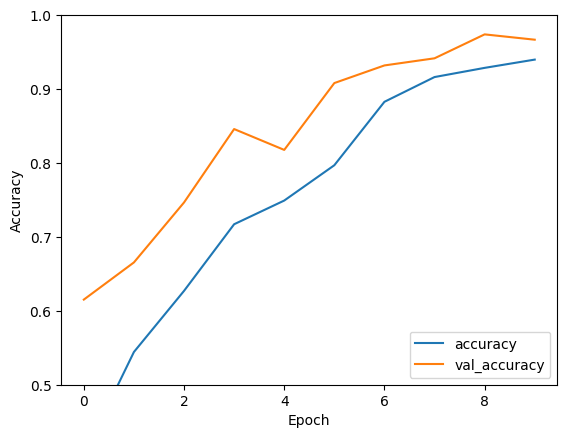

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#### Loss 

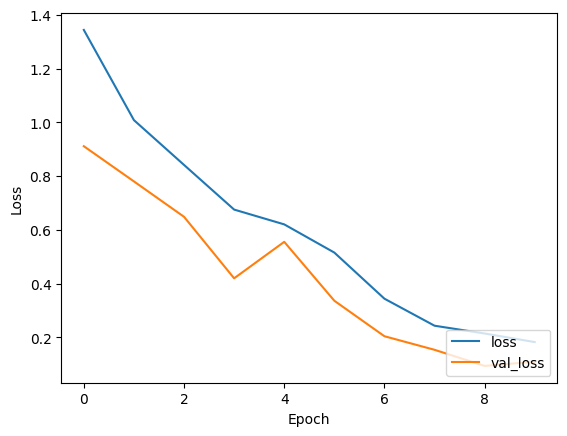

In [36]:
# fig = plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [50]:
loaded_model = load_model(os.path.join('trained_model', 'cnnmodel.h5'))

In [51]:
predicted_classes = loaded_model.evaluate(test)
predicted_classes

391/391 [==============================] - 72s 25ms/step - loss: 0.1113 - accuracy: 0.9650


[0.11127228289842606, 0.9649935960769653]

# Test model

In [ ]:
img = cv2.imread(r'C:\Users\agusb\Desktop\test_images\21F00018\21F00018_0008_NRM.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [120]:
data_uploaded_temp = r'C:\Users\agusb\Desktop\test_images\data_upload_temp'
try:
    os.mkdir(data_uploaded_temp) # maak folder
except OSError as error:
    print(error) # error output

[WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\agusb\\Desktop\\test_images\\data_upload_temp'


In [121]:
data_upload = r'C:\Users\agusb\Desktop\test_images\22F00002'

### Split image for check

In [122]:
image_data = os.listdir(data_upload)

for ximage in image_data:

    img_path = os.path.join(os.path.join(data_upload), ximage) # create a path to the image
    
    img = cv2.imread(img_path) # load image
    
    img = cv2.resize(img, dsize=(5000,5000), interpolation=cv2.INTER_CUBIC) #resize image
    
    full_path = os.path.join(data_uploaded_temp, ximage[:8]) # create path to the image
    
    make_file(full_path) # create folder
    
    hoogte = img.shape[0]
    breedte = img.shape[1]
    
    hoog = hoogte // 25
    breed = breedte // 25
    
    for x in range(0,hoogte, hoog):
        for y in range(0,breedte, breed):
        
            beeld_gesplitst = img[x:x+hoog, y:y+breed]
        
            cv2.imwrite(full_path + '/' + beeld[:-4] + '_' + str(y) + '_' + str(x) + '.png',beeld_gesplitst)

### Predict all splitted images

In [123]:
result_predict = np.array([]) # initialize empty array

for test_beeld in os.listdir(full_path): # iterate images 
    
    img_test_path = os.path.join(os.path.join(full_path), test_beeld) # create path
    
    img_test = cv2.imread(img_test_path) # load image
    
    img_test = tf.image.resize(img_test, (256,256)) # resize image
    
    test_beelden = loaded_model.predict(np.expand_dims(img_test/255, 0)) # normalize image then make prediction
    
    result_predict = np.append(result_predict, np.argmax(test_beelden, axis = 1)) # collect the results and the find the highest value

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


In [124]:
def search_data(b_id):
    return dt[dt['General_Identifier'] == class_names[b_id]]

In [125]:
int_arr = result_predict.astype(int)
counts = np.bincount(int_arr)
most_frequent_predict = np.argmax(counts)
print(most_frequent_predict)
search_data(most_frequent_predict)

7


,General_Identifier,Category_Code,Category_Description,Textile_Description,Structure_and_Construction,Composition,Mass/Weight_in_g/m2,Thickness,Clo_Bending_WEFT_Contact_Distance_mm_,Clo_Bending_WEFT_Contact_Length_mm_,...,Clo_Shear_BIAS_1__Length_in_mm,Clo_Shear_BIAS_1__Force,Clo_Shear_BIAS_2_Length_mm,Clo__Shear_BIAS_2__Force,Clo__Shear_BIAS_3_Length_mm,Clo__Shear_BIAS_3_Force,Clo__Shear_BIAS_4_Length_mm,Clo__Shear_BIAS_4_Force,Clo__Shear_BIAS_5_Length_mm,Clo__Shear_BIAS_5_Force
7,22F00002,D2,Suiting,Wool (CK),Woven,"Wo (warp), PES, CV, EL (Weft)",198 g/m2,0.42,15.333333,29.0,...,5.0,0.01,15.0,0.035,25.0,0.088333,35.0,0.150333,45.0,0.266333
